# DATA 747 – Week 12 Lab
## Advanced Machine Learning Techniques – Convolutional Neural Network (CNN)
**Student:** Michael Kamp  

This notebook implements a **convolutional neural network (CNN)** using **TensorFlow/Keras** to classify images from the CIFAR-10 dataset. The model is trained, evaluated, and visualized following the Week 12 assignment guidelines.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# For reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print("TensorFlow version:", tf.__version__)



TensorFlow version: 2.15.1


In [2]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("Training images:", x_train.shape)
print("Training labels:", y_train.shape)
print("Test images:", x_test.shape)
print("Test labels:", y_test.shape)


Training images: (50000, 32, 32, 3)
Training labels: (50000, 1)
Test images: (10000, 32, 32, 3)
Test labels: (10000, 1)


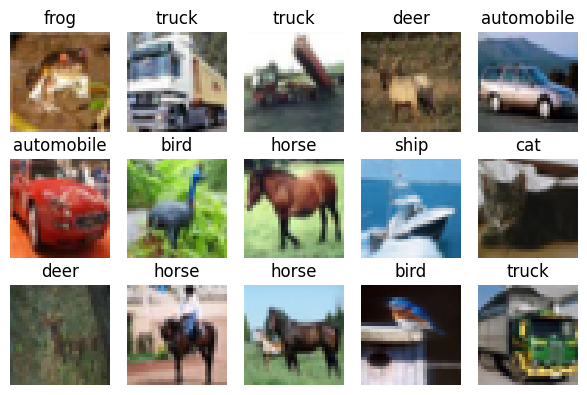

In [3]:
class_names = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

plt.figure(figsize=(6, 4))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis("off")
plt.tight_layout()
plt.show()


In [4]:
# Normalize pixel values to the range [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# Create a validation set from the training data
from sklearn.model_selection import train_test_split

x_train_small, x_val, y_train_small, y_val = train_test_split(
    x_train, y_train,
    test_size=0.2,
    stratify=y_train,
    random_state=42
)

print("Train subset:", x_train_small.shape)
print("Validation set:", x_val.shape)
print("Test set:", x_test.shape)


Train subset: (40000, 32, 32, 3)
Validation set: (10000, 32, 32, 3)
Test set: (10000, 32, 32, 3)


In [5]:
from tensorflow import keras
from tensorflow.keras import layers

input_shape = x_train_small.shape[1:]  # (32, 32, 3)

model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax")
])

model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 64)         

In [6]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


In [7]:
epochs = 15
batch_size = 64

history = model.fit(
    x_train_small, y_train_small,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_val, y_val)
)


Epoch 1/15


625/625 [==============================] - 40s 61ms/step - loss: 1.7370 - accuracy: 0.3614 - val_loss: 1.3655 - val_accuracy: 0.5008
Epoch 2/15
625/625 [==============================] - 38s 60ms/step - loss: 1.3632 - accuracy: 0.5097 - val_loss: 1.1488 - val_accuracy: 0.5946
Epoch 3/15
625/625 [==============================] - 38s 60ms/step - loss: 1.2000 - accuracy: 0.5719 - val_loss: 1.0417 - val_accuracy: 0.6281
Epoch 4/15
625/625 [==============================] - 38s 60ms/step - loss: 1.0920 - accuracy: 0.6111 - val_loss: 0.9191 - val_accuracy: 0.6765
Epoch 5/15
625/625 [==============================] - 37s 60ms/step - loss: 1.0193 - accuracy: 0.6402 - val_loss: 0.8723 - val_accuracy: 0.6922
Epoch 6/15
625/625 [==============================] - 39s 62ms/step - loss: 0.9629 - accuracy: 0.6614 - val_loss: 0.8237 - val_accuracy: 0.7101
Epoch 7/15
625/625 [==============================] - 37s 60ms/step - loss: 0.9176 - accuracy: 0.6765 - val_loss: 0.8126 - val_accurac

In [8]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Loss: 0.6874
Test Accuracy: 0.7602


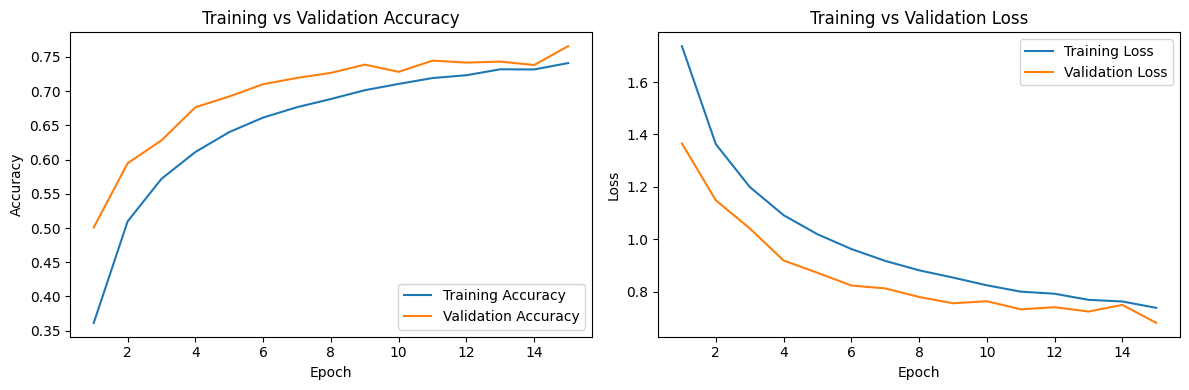

In [9]:
def plot_history(history):
    acc = history.history["accuracy"]
    val_acc = history.history["val_accuracy"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    epochs_range = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 4))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label="Training Accuracy")
    plt.plot(epochs_range, val_acc, label="Validation Accuracy")
    plt.title("Training vs Validation Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label="Training Loss")
    plt.plot(epochs_range, val_loss, label="Validation Loss")
    plt.title("Training vs Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)


1/1 [==============================] - 0s 160ms/step


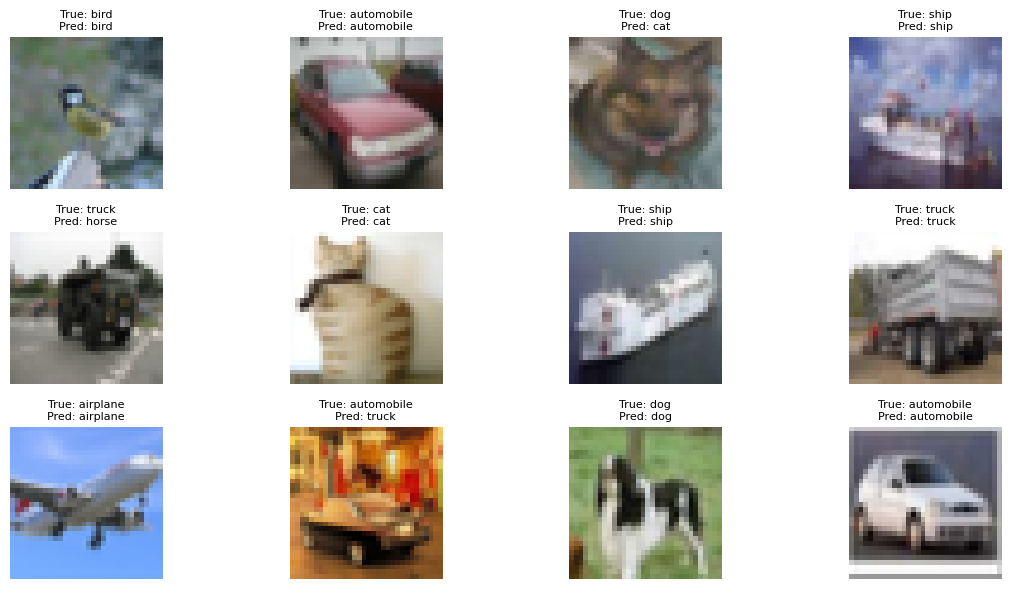

In [10]:
num_images = 12
indices = np.random.choice(len(x_test), num_images, replace=False)

x_sample = x_test[indices]
y_true = y_test[indices]

y_prob = model.predict(x_sample)
y_pred = np.argmax(y_prob, axis=1)

plt.figure(figsize=(12, 6))
for i in range(num_images):
    plt.subplot(3, 4, i + 1)
    plt.imshow(x_sample[i])
    true_label = class_names[y_true[i][0]]
    pred_label = class_names[y_pred[i]]
    plt.title(f"True: {true_label}\nPred: {pred_label}", fontsize=8)
    plt.axis("off")

plt.tight_layout()
plt.show()


## **Discussion**

In this lab, I implemented a convolutional neural network (CNN) using TensorFlow/Keras to classify images from the CIFAR-10 dataset. The dataset contains 60,000 color images across ten classes such as automobiles, trucks, dogs, and birds. After preprocessing and creating a training/validation split, I trained a CNN with three convolution-pooling blocks followed by fully connected layers with dropout for regularization.

Training results indicate that the model learned effectively across the 15 epochs. Training accuracy improved from approximately 36% in the first epoch to about 74% by the final epoch. Validation accuracy followed a similar trend, ultimately reaching approximately 76%. The close alignment of these two curves suggests that the model generalized well to unseen data and did not overfit. This is further supported by the loss curves, where both training and validation loss decrease steadily and remain closely aligned.

Final evaluation on the held-out test set produced a test accuracy of ~75.6%, which is consistent with the validation results. This performance is typical for a CNN of this size trained on CIFAR-10 and indicates the network successfully learned meaningful features from the images.

A visualization of sample predictions further demonstrates model behavior. The CNN correctly classified many test images, including challenging categories such as trucks and dogs. Some misclassifications occurred, especially between visually similar classes (e.g., dog vs. cat), which is expected due to the low resolution (32×32) of CIFAR-10 images. Overall, the model shows strong performance and good generalization for a first-iteration convolutional neural network.